## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load the data

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

In [4]:
null_columns = titanic_df.columns[titanic_df.isnull().any()]

for col in null_columns:
    print('{} column has {} missing values'.format(col,titanic_df[col].isnull().sum()))

Age column has 177 missing values
Cabin column has 687 missing values
Embarked column has 2 missing values


In [5]:
len(titanic_df)

891

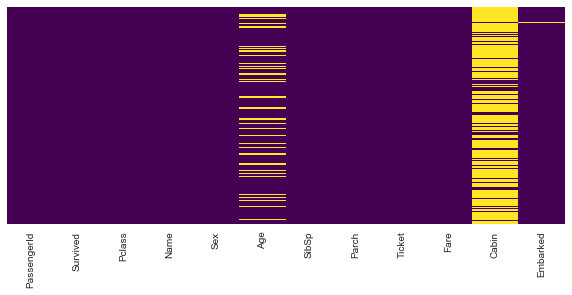

In [6]:
sns.set(rc={"figure.figsize": (10, 4)})
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

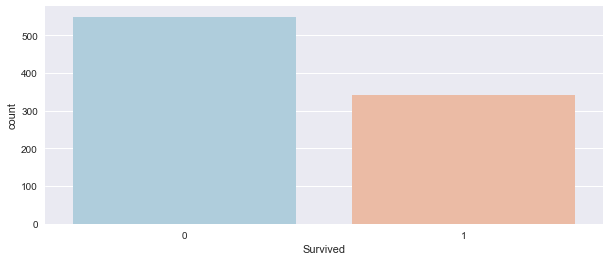

In [7]:
#sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic_df,palette='RdBu_r')

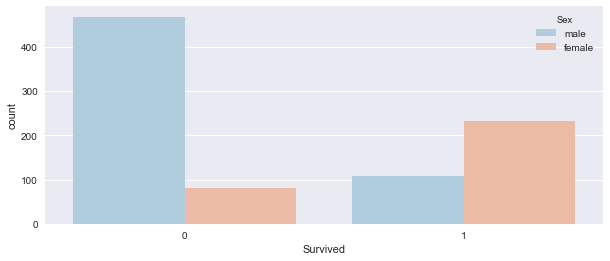

In [8]:
sns.countplot(x='Survived',hue = 'Sex', data=titanic_df,palette='RdBu_r')

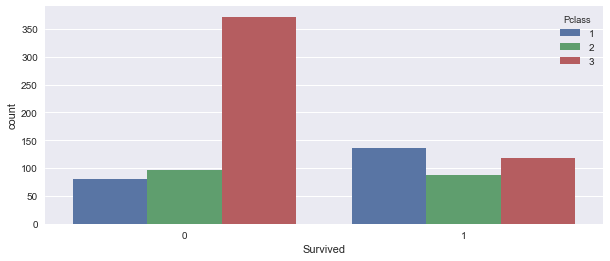

In [9]:
sns.countplot(x='Survived',hue = 'Pclass', data=titanic_df)

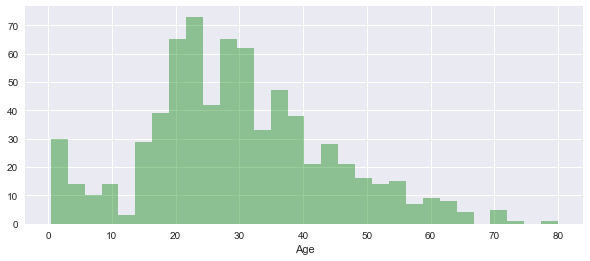

In [10]:
sns.distplot(titanic_df['Age'].dropna(),kde=False,color='green',bins=30)

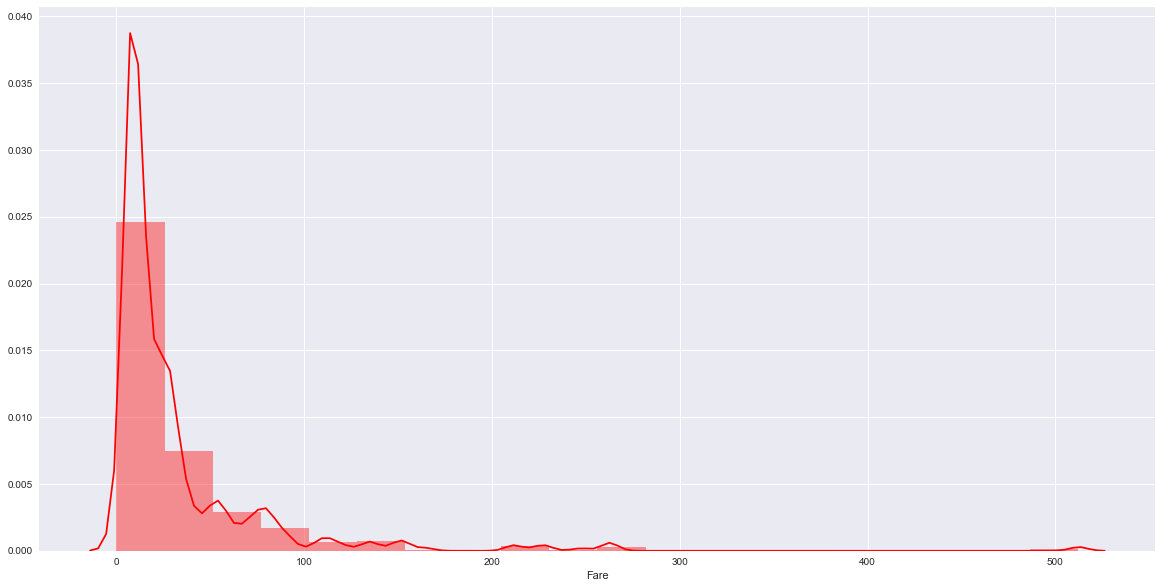

In [11]:
sns.set(rc={"figure.figsize": (20, 10)});
sns.distplot(titanic_df['Fare'].dropna(),kde=True,color='red',bins=20)

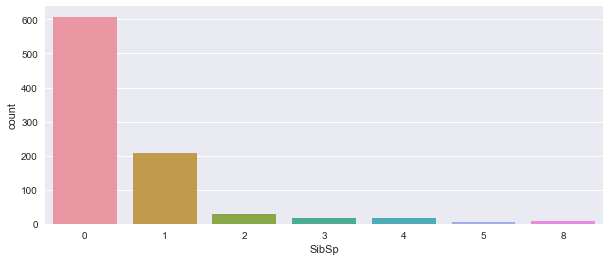

In [12]:
sns.set(rc={"figure.figsize": (10, 4)});
sns.countplot(x='SibSp',data=titanic_df)

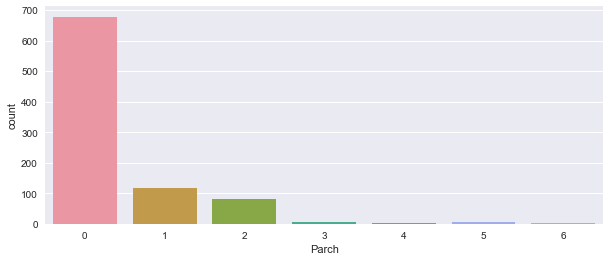

In [13]:
sns.countplot(x='Parch',data=titanic_df)

## Data Cleaning

In [14]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [15]:
for col in null_columns:
    print('{} column has {} missing values'.format(col,titanic_df[col].isnull().sum()))

Age column has 177 missing values
Cabin column has 687 missing values
Embarked column has 2 missing values


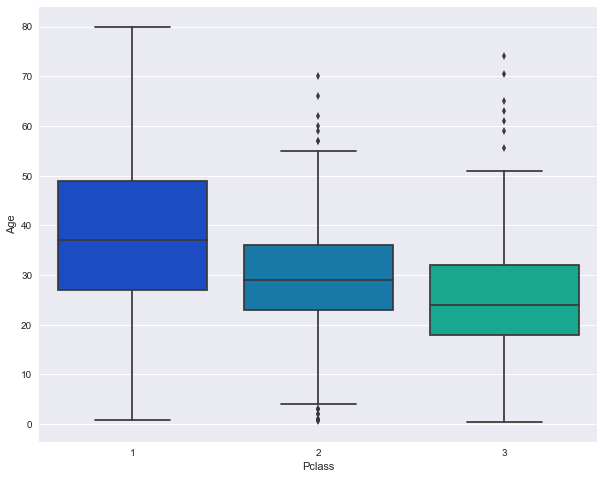

In [16]:
sns.set(rc={"figure.figsize": (10, 8)});
sns.boxplot(x='Pclass',y='Age',data=titanic_df,palette='winter')

In [17]:
# Class 1 median Age
titanic_df[titanic_df['Pclass'] == 1]['Age'].median()

37.0

In [18]:
# Class 2 median Age
titanic_df[titanic_df['Pclass'] == 2]['Age'].median()

29.0

In [19]:
# Class 3 median Age
titanic_df[titanic_df['Pclass'] == 3]['Age'].median()

24.0

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [21]:
titanic_df['Age'] = titanic_df[['Age','Pclass']].apply(impute_age,axis=1)

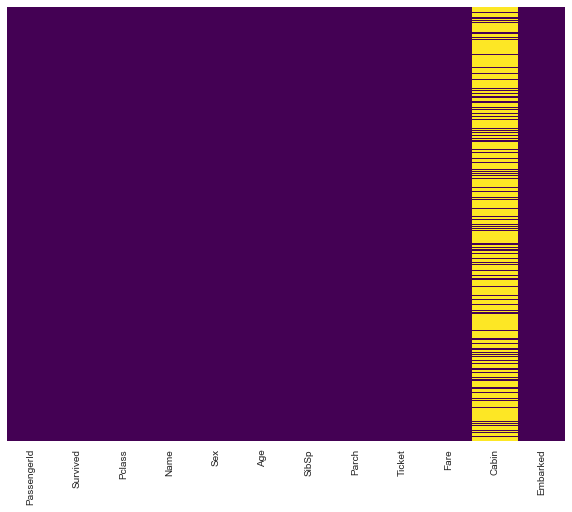

In [22]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
# Let's drop the cabin column
titanic_df.drop('Cabin',axis=1,inplace=True)

In [24]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked        True
dtype: bool

In [25]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
titanic_df['Embarked'].fillna(value = 'S', inplace= True)

In [27]:
titanic_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

## Handling categorical values

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [30]:
# Pandas way to create dummy variables
pd.get_dummies(titanic_df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [31]:
pd.get_dummies(titanic_df['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [32]:
sex = pd.get_dummies(titanic_df['Sex'],drop_first=True)
embark = pd.get_dummies(titanic_df['Embarked'],drop_first=True)

In [33]:
print(sex.head())
print('#########')
print(embark.head())

   male
0     1
1     0
2     0
3     0
4     1
#########
   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [34]:
# Drop the original columns from dataframe
titanic_df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [35]:
# Add the dummy columns created earlier to the dataframe
titanic_df  = pd.concat([titanic_df, sex, embark], axis=1)

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1


In [37]:
# Drop the text columns
titanic_df.drop(['Name','Ticket'],axis=1,inplace=True)

In [38]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Train Test split

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# Prepare X and y
X = titanic_df.drop('Survived', axis = 1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Apply Model

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

In [43]:
# Fit the model on the training set
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
predictions = lr.predict(X_test)

In [45]:
# Observe top 5 predictions
predictions[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [46]:
y_test[:5]

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

## Evaluation

In [47]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

In [48]:
cm

array([[136,  21],
       [ 32,  79]])

In [49]:
from sklearn.metrics import classification_report

In [50]:
names = ['Not survived', 'Survived']
print(classification_report(y_test,predictions, target_names=names))

              precision    recall  f1-score   support

Not survived       0.81      0.87      0.84       157
    Survived       0.79      0.71      0.75       111

 avg / total       0.80      0.80      0.80       268



In [51]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.80223880597014929

In [52]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = pd.DataFrame(titanic_df.columns.delete(1))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(lr.coef_[0])

coeff_df

,Features,Coefficient Estimate
0,PassengerId,0.000514
1,Pclass,-0.681654
2,Age,-0.023497
3,SibSp,-0.243194
4,Parch,-0.095573
5,Fare,0.005430
6,male,-2.377795
7,Q,-0.059235
8,S,-0.369517


In [53]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = lr.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred_prob))


0.875251047226


# More details about classifier model evaluation can be fopund here: https://www.youtube.com/watch?v=85dtiMz9tSo